# Import packages

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load and read the data

In [68]:
data = pd.read_csv('E:\jar-model\jartest.csv')
data = data.drop(columns=['Date'])
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\j'
<>:1: SyntaxWarning: invalid escape sequence '\j'
C:\Users\HP\AppData\Local\Temp\ipykernel_30600\3555939203.py:1: SyntaxWarning: invalid escape sequence '\j'
  data = pd.read_csv('E:\jar-model\jartest.csv')


,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [69]:
# Drop rows with missing target values
data = data.dropna(subset=['Turbidity', 'PH', 'Colour'])
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [70]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy

In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [ ]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

## PH

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [ ]:
model_ph =  RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features="sqrt",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_ph.fit(X_ph_train, y_ph_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=200, random_state=42)

## Colour

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [ ]:
model_colour = RandomForestRegressor(
    n_estimators=300,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="log2",
    max_depth=None,
    bootstrap=False,
    random_state=42
)

In [ ]:
model_colour.fit(X_colour_train, y_colour_train)

RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=300,
                      random_state=42)

# Model Testing & Validation

In [ ]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([ 2.49893333, 15.61466667, 17.4654    , ..., 27.19963333,
       17.6194    ,  3.25063333], shape=(1022,))

In [ ]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4139,1.90,2.498933
586,22.00,15.614667
553,16.00,17.465400
227,19.00,13.198533
1321,11.56,12.992233
...,...,...
1433,13.50,16.884133
1018,13.00,12.976333
582,42.00,27.199633
203,16.00,17.619400


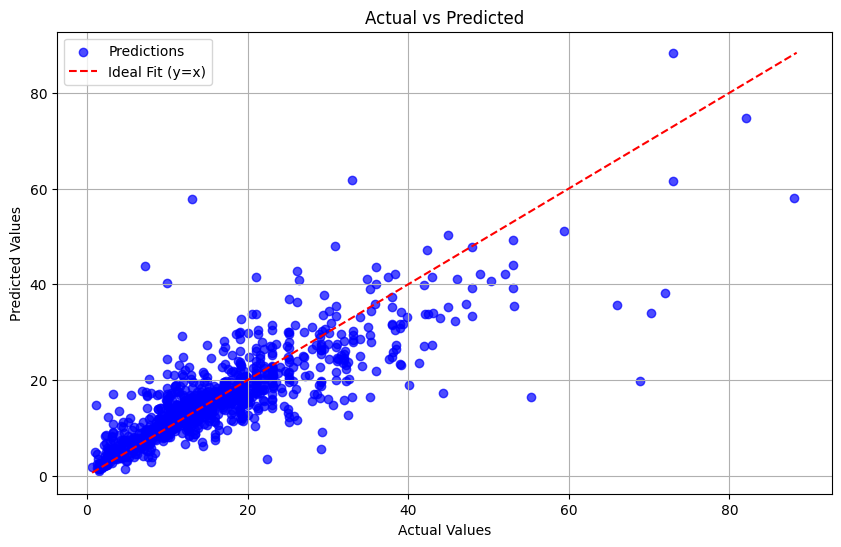

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()

In [ ]:
y_ph_pred = model_ph.predict(X_ph_test)
y_ph_pred

array([7.44132212, 6.90405524, 6.83661358, ..., 6.89568495, 7.11283667,
       7.3622969 ], shape=(1022,))

In [ ]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4139,7.43,7.441322
586,6.92,6.904055
553,6.82,6.836614
227,7.00,7.160665
1321,6.85,6.822133
...,...,...
1433,6.91,6.877775
1018,6.67,6.674242
582,6.82,6.895685
203,7.13,7.112837


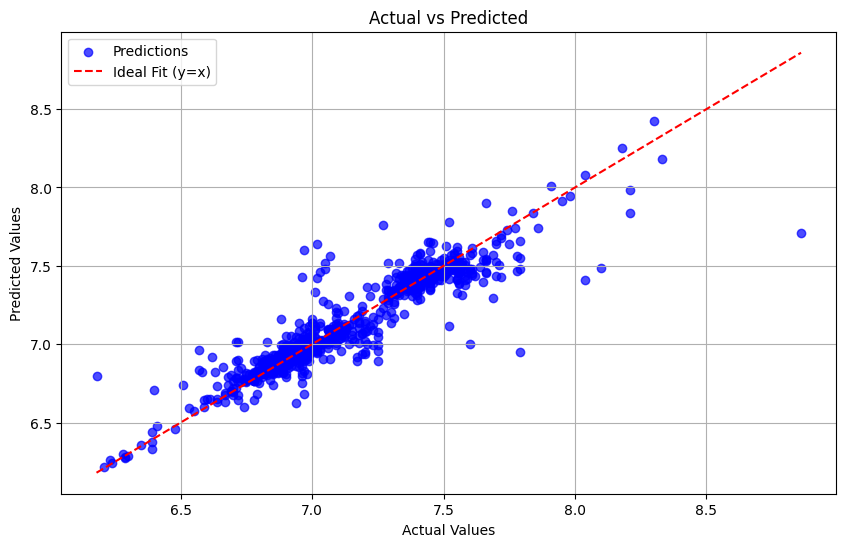

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 18.43566667,  15.69666667,  23.73666667, ...,  26.86333333,
       111.06666667,  15.70333333], shape=(1022,))

In [ ]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})

results_Colo

,Actual,Predicted
4139,10.0,18.435667
586,17.0,15.696667
553,19.0,23.736667
227,20.0,15.306667
1321,26.0,31.290000
...,...,...
1433,28.0,35.683333
1018,33.0,26.606667
582,25.0,26.863333
203,130.0,111.066667


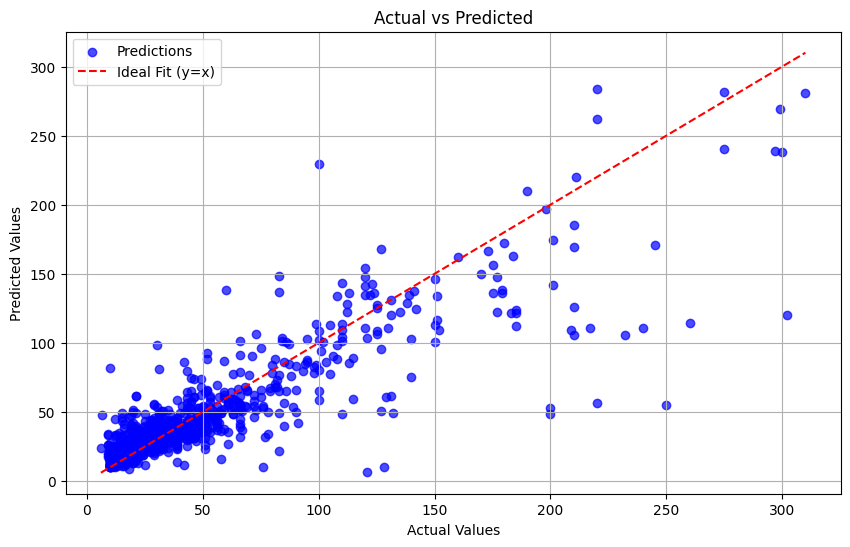

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")



Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 3.84
R-squared (R²): 0.68

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.06
R-squared (R²): 0.87

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 11.81
R-squared (R²): 0.76
